Name : **Pratik Agrawal**  
Matrikel-Nr : **804861**

## Fire in the nature park

***Problem Summary***

The administration of the nature park Montesinho in north-east Portugal wants to predict wild fires based on wheather data of the Fire-Wheather-Index (FWI). The aim is to recognize the affected area and consequently the intensity of the imminent wild fire as early as possible in order to be able to adequatly assess the danger caused by the fire. To this aim, data from 517 wild fires have been collected. The features are summarized below

***Features***

- X (X-coordinate of the fire in the park: 1 to 9)
- Y (Y-coordinate of the fire in the park: 2 to 9)
- Month month: ”jan“ to ”dec“)
- day (day: ”mon“ bis ”sun“)
- FFMC (FFMC index of the FWI system: 18.7 to 96.2)
- DMC (DMC index of the FWI system: 1.1 bis 291.3)
- DC (DC index of the system: 7.9 bis 860.6)
- ISI (ISI index of the FWI systems: 0.0 to 56.1)
- temp (temperature in degrees Celsius: 2.2 to 33.3)
- RH (relative humidity in %: 15 to 100)
- wind (wind velocity in km/h: 0.4 to 9.4)
- rain (rainfall in mm/m2: 0.0 to 6.4)
- **area (forest area that has been burnt in hectare: 0.09 to 1090.84)**


You have been asked to develop a model that predicts **the burnt forest** area as accurately as possible from the given data.

***Exercise***

Load the data into Python and preprocess them appropriately; perform an adequate normalization of the features. For example, the label area is distributed very non-uniformly such that a transformation such as area = log(1 + area) is appropriate. Identify and
implement a suitable learning method in Python. Train and evaluate the model. Propose a trivial baseline model with which you can compare your models performance. Apply a reasonable evaluation method. Provide a short documentation and motivation of each of your steps.



**This notebook is primarily divided into two sections,** 

    * In first section, Data-Preprocessing & code for original paper[1] is implemented. Motivation behind this step is to setup a baseline expectation for my own experiments and see if we can get better results then what is presented in paper. 
    * Understanding Data & Problem from Authors Experiments & Results
    * In second section,  Experimentation with different learning methods and their results are presented. What else can be done to improve predictions?
    
    [1] Paulo Cortez1 and Anibal Morais, A Data Mining Approach to Predict Forest Fires using Meteorological Data 

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector


from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn import metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.svm import SVC


from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn import linear_model


warnings.filterwarnings("ignore")

df = pd.read_csv('fires.csv') # importing the dataset


## Data Pre-processing & Analysis

In [32]:
df.info() # No Missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [33]:
df.shape

(517, 13)

In [34]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## distribution of independent variables
- Skewed or not?

array([[<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'X'}>],
       [<AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'wind'}>, <AxesSubplot:>]],
      dtype=object)

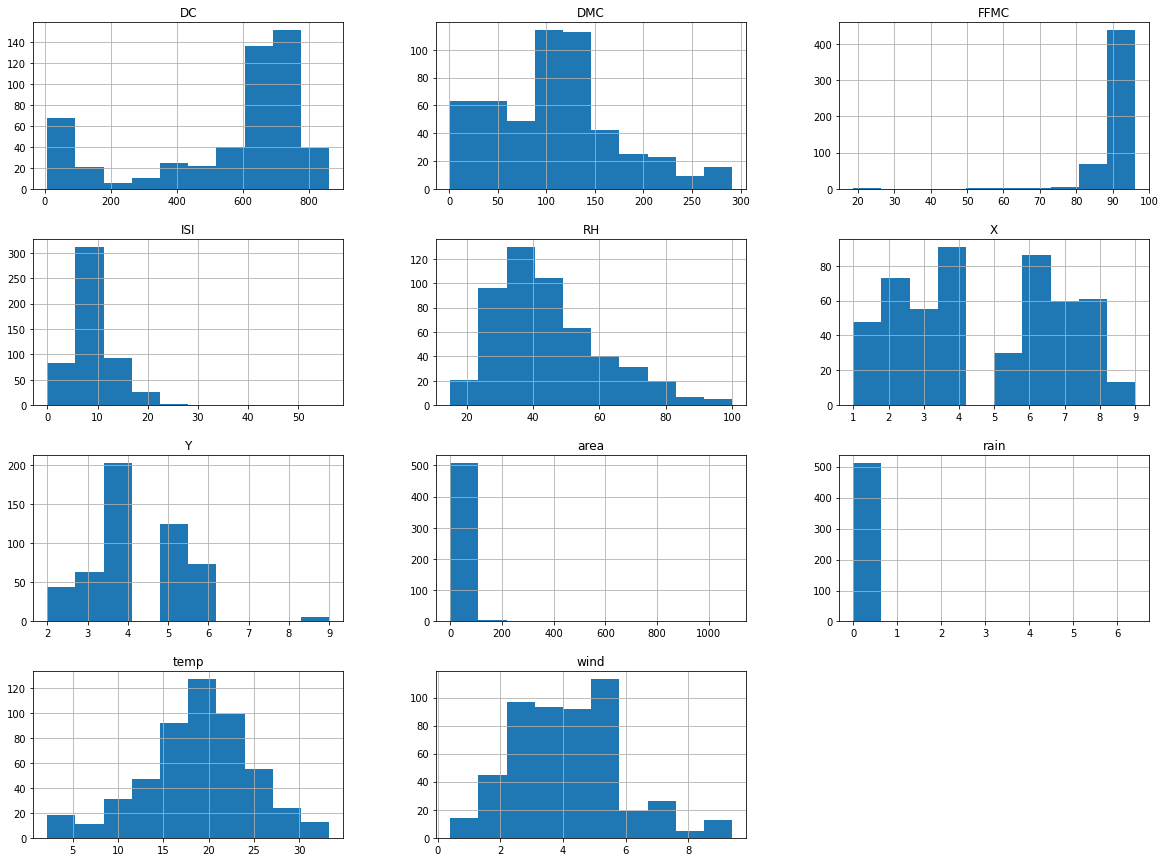

In [35]:
df.hist(figsize=(20,15))

## Checking the independence between the X features, which can result in multicollinearity problem

<AxesSubplot:>

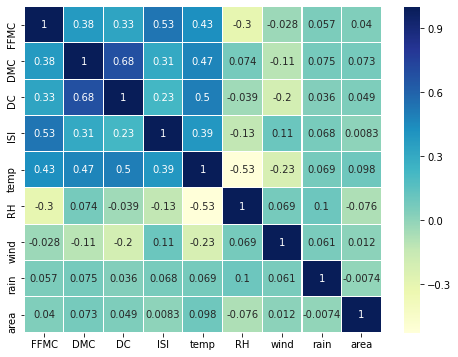

In [36]:
#Remove some of the highly correlated independent variables. (if multicollinearity problem)

ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain', 'area']
cm = np.corrcoef(df[ncols].values.T) 
f, ax = plt.subplots(figsize =(8, 6)) 
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=True,linewidths = 0.1, yticklabels = ncols,xticklabels = ncols) 

## Looking at the distribution of dependent variable & applying log transformation as the label is skewed 

<AxesSubplot:ylabel='Frequency'>

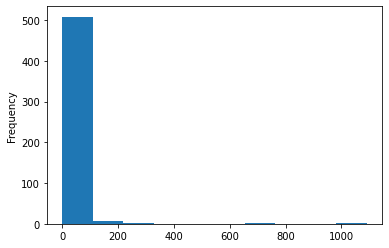

In [37]:
# Fired area in histogram
df["area"].plot(kind='hist', bins=10)

<AxesSubplot:ylabel='Frequency'>

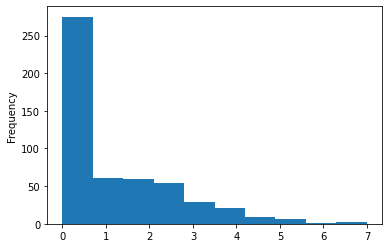

In [38]:
# Applying Log Transformation
df["area_ln"]=[ 0 if np.isinf(x) else x for x in (df["area"]+1).apply(np.log) ]
## After log applied
df["area_ln"].plot(kind='hist', bins=10)

# Some Observations from Data
- There is no **null** values in data
- X,Y, month, day columns are **categorical values** 
- The burned area is shown in Figure, denoting a positive skew, with the majority of the fires presenting a small size.  Regarding the present dataset, there are 247 samples with a zero value. To reduce skewness and improve symmetry, the logarithm function y = ln(x + 1), which is a common transformation that tends to improve regression results for right-skewed targets, was applied to the area attribute.


## Transforming Categorical features into numerical features & Standardizing other numerical features

- all attributes were standardized to a zero mean and one standard deviation
- one hot encoding for categorical values
- Feature Grouping: STFWI – using spatial, temporal and the four FWI components; STM– with the spatial, temporal and four weather variables; FWI – using only the four FWI components; andM– with the four weather conditions. To

In [39]:
labels_transformed = df.pop('area_ln')
labels_original = df.pop('area')
cols = [col for col in df.columns if col not in ['X','Y','month','day']]
dataset_for_std = df[cols]

cols = [col for col in df.columns if col in ['X','Y','month','day']]
dataset_for_dummies  = df[cols]
dataset_for_std.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [40]:
dataset_for_dummies.head() # Categorical Features

,X,Y,month,day
0,7,5,mar,fri
1,7,4,oct,tue
2,7,4,oct,sat
3,8,6,mar,fri
4,8,6,mar,sun


In [41]:
# Standardizing the dataset 
'''Standardization refers to shifting the distribution of each attribute to have a mean of zero 
and a standard deviation of one (unit variance).'''

scaled_features = StandardScaler().fit_transform(dataset_for_std.values)

# Creating back the dataframe of the scaled data
dataset = pd.DataFrame(scaled_features, index=dataset_for_std.index, columns=dataset_for_std.columns)
dataset.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268


In [42]:
categorical_features  =pd.get_dummies(data=dataset_for_dummies, columns=['X','Y','month','day'], drop_first=True)


dataset = pd.concat([dataset, categorical_features], axis=1, sort=False)


In [43]:
## Droping Extra catergorical value field (Degree of freedom from categorical values : n-1)
#dataset=dataset.drop(columns=['day_fri', 'month_dec'])
dataset.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,X_2,X_3,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,0,0,...,0,0,1,0,0,0,0,0,1,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,0,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:

# Partitioning the dataset into test and train (test = (25% of total data) and train = (75% of total data) )
X_train, X_test, y_train, y_test = train_test_split(dataset, labels_transformed, test_size=0.25, random_state = 4)

# Importing all the required Regressors used in the paper

clf_nb = BayesianRidge(compute_score=True) # Naive-Bayes Ridge Regressor
clf_mr = LinearRegression() # Multiple-Regression
clf_dt = DecisionTreeRegressor(max_depth=2,random_state=0) # Decision Tree Regressor
clf_rf = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=10) # Random Forest Regressor
clf_nn = MLPRegressor() # Neural Networks Regressor


In [45]:
# for STFWI : Spatial, temporal, and Forest Waether Index features are taken
cols = [col for col in X_train.columns if col not in ['temp', 'RH','wind','rain']]

train_features_one = X_train[cols].copy()
test_features_one = X_test[cols].copy()

In [46]:
train_features_one.head()

,FFMC,DMC,DC,ISI,X_2,X_3,X_4,X_5,X_6,X_7,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
329,0.282028,-0.133975,0.821382,-0.136477,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
61,-0.243833,-0.931043,-1.798600,0.126966,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
76,-0.733427,-1.526500,-2.037477,-0.817038,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0.209495,-0.505940,0.711628,0.039151,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
192,0.753489,-0.040203,0.400119,1.751531,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [47]:
def calculate_errors(predictions,method):
    ## get originl area from the transformed one.
    y_test_orig = np.exp(y_test)-1
    predictions_inverse = np.exp(predictions)-1


    y_test_orig[y_test_orig < 0] = 0
    predictions_inverse[predictions_inverse<0] = 0

    # RootMeanSquared Error Calculation 
    print("\n\nFor "+method)
    meanSquaredError_nb_one = mean_squared_error(y_test_orig, predictions_inverse)
    #print("MSE:", meanSquaredError_nb_one)
    rootMeanSquaredError_nb_one = sqrt(meanSquaredError_nb_one)
    print("RMSE:", rootMeanSquaredError_nb_one)

    # MeanAbsolute Error Calculation 
    absolute_error_nb_one = mean_absolute_error(y_test_orig, predictions_inverse)
    print("Absolute error is:", absolute_error_nb_one)
    
    meanSquaredError = mean_squared_error(y_test, predictions)
    rootMeanSquaredError = sqrt(meanSquaredError)
    print("RMSE_transformed:", rootMeanSquaredError)
    
    #print("R2 error is:",r2_score(y_test_orig, predictions_inverse))


In [48]:
# Naive Bayes Regressor

# Training using Naive Bayes Regressor
clf_nb.fit(train_features_one, y_train)
# Testing using Naive Bayes Regressor
predictions_nb_one = clf_nb.predict(test_features_one)


# Linear Regression

# Training using Linear Regression
clf_mr.fit(train_features_one, y_train)
# Testing using Linear Regression
predictions_mr_one = clf_mr.predict(test_features_one)

# Decision Trees Regressor

# Training using Decision Trees Regressor
clf_dt.fit(train_features_one, y_train)
# Testing using Decision Trees Regressor
predictions_dt_one = clf_dt.predict(test_features_one)


# Random Forest Regressor

# Training using Random Forest Regressor
clf_rf.fit(train_features_one, y_train)
# Testing using Random Forest Regressor
predictions_rf_one = clf_rf.predict(test_features_one)



# MLP Regressor

# Training using MLP Regressor
clf_nn.fit(train_features_one, y_train)
# Testing using MLP Regressor
predictions_nn_one = clf_nn.predict(test_features_one)



# SVM Regressor
clf_svm = SVR(C=3.0, epsilon=0.2) # SVM Regressor
# Training using SVM Regressor
clf_svm.fit(train_features_one, y_train)
# Testing using SVM Regressor
predictions_svm_one = clf_svm.predict(test_features_one)


calculate_errors(predictions_nb_one,"Naive Bayes")
calculate_errors(predictions_mr_one,"Linear Regression")
calculate_errors(predictions_dt_one,"Decision Trees")
calculate_errors(predictions_rf_one,"Random Forest")
calculate_errors(predictions_nn_one,"MLP ")
calculate_errors(predictions_svm_one,"SVM ")





For Naive Bayes
RMSE: 67.22176276795037
Absolute error is: 13.220913683238178
RMSE_transformed: 1.4126900527307973


For Linear Regression
RMSE: 67.19666595372317
Absolute error is: 13.127579242069771
RMSE_transformed: 1.423049705623072


For Decision Trees
RMSE: 78.24444703013225
Absolute error is: 18.23364213223142
RMSE_transformed: 1.5811285844525704


For Random Forest
RMSE: 67.21730588110283
Absolute error is: 13.26016309087165
RMSE_transformed: 1.4241184589540028


For MLP 
RMSE: 67.29269344824831
Absolute error is: 13.44110389245013
RMSE_transformed: 1.5139717765338907


For SVM 
RMSE: 67.34803441378281
Absolute error is: 13.360849051489874
RMSE_transformed: 1.564100865782897


In [49]:
# for STM : Spatial, temporal, and Meterological features are taken

cols = [col for col in X_train.columns if col not in ['FFMC', 'DMC', 'DC', 'ISI']]

train_features_two = X_train[cols].copy()
test_features_two = X_test[cols].copy()

train_features_two.head()

,temp,RH,wind,rain,X_2,X_3,X_4,X_5,X_6,X_7,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
329,0.794833,-1.060516,-0.009834,-0.073268,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
61,-2.308077,0.902471,1.275141,-0.073268,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
76,-0.549761,-0.079023,-0.512650,-0.073268,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0.001867,-0.569770,-0.736124,-0.073268,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
192,0.984455,-1.367233,0.269509,-0.073268,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
# Importing all the required Regressors used in the paper

clf_nb = BayesianRidge(compute_score=True) # Naive-Bayes Ridge Regressor
clf_mr = LinearRegression() # Multiple-Regression
clf_dt = DecisionTreeRegressor(max_depth=2,random_state=0) # Decision Tree Regressor
clf_rf = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=10) # Random Forest Regressor
clf_nn = MLPRegressor() # Neural Networks Regressor


# Naive Bayes Regressor

# Training using Naive Bayes Regressor
clf_nb.fit(train_features_two, y_train)
# Testing using Naive Bayes Regressor
predictions_nb_two = clf_nb.predict(test_features_two)


# Linear Regression

# Training using Linear Regression
clf_mr.fit(train_features_two, y_train)
# Testing using Linear Regression
predictions_mr_two = clf_mr.predict(test_features_two)


# Decision Trees Regressor

# Training using Decision Trees Regressor
clf_dt.fit(train_features_two, y_train)
# Testing using Decision Trees Regressor
predictions_dt_two = clf_dt.predict(test_features_two)


# Random Forest Regressor

# Training using Random Forest Regressor
clf_rf.fit(train_features_two, y_train)
# Testing using Random Forest Regressor
predictions_rf_two = clf_rf.predict(test_features_two)


# MLP Regressor

# Training using MLP Regressor
clf_nn.fit(train_features_two, y_train)
# Testing using MLP Regressor
predictions_nn_two = clf_nn.predict(test_features_two)


# SVM Regressor

# Training using SVM Regressor
clf_svm.fit(train_features_two, y_train)
# Testing using SVM Regressor
predictions_svm_two = clf_svm.predict(test_features_two)


calculate_errors(predictions_nb_two,"Naive Bayes")
calculate_errors(predictions_mr_two,"Linear Regression")
calculate_errors(predictions_dt_two,"Decision Trees")
calculate_errors(predictions_rf_two,"Random Forest")
calculate_errors(predictions_nn_two,"MLP ")
calculate_errors(predictions_svm_two,"SVM ")



For Naive Bayes
RMSE: 67.20873824429964
Absolute error is: 13.237763427449115
RMSE_transformed: 1.4102895689025217


For Linear Regression
RMSE: 67.18530952645197
Absolute error is: 13.169050764139683
RMSE_transformed: 1.427534590093115


For Decision Trees
RMSE: 67.20022120162578
Absolute error is: 13.199686230362618
RMSE_transformed: 1.397944987784968


For Random Forest
RMSE: 67.13067344998115
Absolute error is: 13.27359690347384
RMSE_transformed: 1.4125971296511115


For MLP 
RMSE: 67.26192811602496
Absolute error is: 13.597827093620197
RMSE_transformed: 1.4933607129634887


For SVM 
RMSE: 67.37076188390857
Absolute error is: 13.226263845599904
RMSE_transformed: 1.4941055739435258


In [51]:
# for FWI : Forest Weather Index features are taken

train_features_three = X_train[['FFMC', 'DMC', 'DC', 'ISI']].copy()
test_features_three = X_test[['FFMC', 'DMC', 'DC', 'ISI']].copy()

train_features_three.head()

,FFMC,DMC,DC,ISI
329,0.282028,-0.133975,0.821382,-0.136477
61,-0.243833,-0.931043,-1.798600,0.126966
76,-0.733427,-1.526500,-2.037477,-0.817038
113,0.209495,-0.505940,0.711628,0.039151
192,0.753489,-0.040203,0.400119,1.751531


In [52]:
# Naive Bayes Regressor

# Training using Naive Bayes Regressor
clf_nb.fit(train_features_three, y_train)
# Testing using Naive Bayes Regressor
predictions_nb_three = clf_nb.predict(test_features_three)

# Linear Regression

# Training using Linear Regression
clf_mr.fit(train_features_three, y_train)
# Testing using Linear Regression
predictions_mr_three = clf_mr.predict(test_features_three)


# Decision Trees Regressor

# Training using Decision Trees Regressor
clf_dt.fit(train_features_three, y_train)
# Testing using Decision Trees Regressor
predictions_dt_three = clf_dt.predict(test_features_three)


# Random Forest Regressor

# Training using Random Forest Regressor
clf_rf.fit(train_features_three, y_train)
# Testing using Random Forest Regressor
predictions_rf_three = clf_rf.predict(test_features_three)


# MLP Regressor

# Training using MLP Regressor
clf_nn.fit(train_features_three, y_train)
# Testing using MLP Regressor
predictions_nn_three = clf_nn.predict(test_features_three)


# SVM Regressor

# Training using SVM Regressor
clf_svm.fit(train_features_three, y_train)
# Testing using SVM Regressor
predictions_svm_three = clf_svm.predict(test_features_three)

calculate_errors(predictions_nb_three,"Naive Bayes")
calculate_errors(predictions_mr_three,"Linear Regression")
calculate_errors(predictions_dt_three,"Decision Trees")
calculate_errors(predictions_rf_three,"Random Forest")
calculate_errors(predictions_nn_three,"MLP ")
calculate_errors(predictions_svm_three,"SVM ")



For Naive Bayes
RMSE: 67.21717237199098
Absolute error is: 13.223854238045552
RMSE_transformed: 1.4098722977882419


For Linear Regression
RMSE: 67.19807492299748
Absolute error is: 13.219745451023986
RMSE_transformed: 1.4166086147244263


For Decision Trees
RMSE: 78.24444703013222
Absolute error is: 18.23364213223142
RMSE_transformed: 1.5811285844525704


For Random Forest
RMSE: 67.28631369652135
Absolute error is: 13.607149752502767
RMSE_transformed: 1.4733352886736617


For MLP 
RMSE: 67.22155126721341
Absolute error is: 13.324784246500979
RMSE_transformed: 1.4703331273878033


For SVM 
RMSE: 67.39785268821308
Absolute error is: 13.146614888002594
RMSE_transformed: 1.5406868544007182


In [53]:
# for M (using only four weather conditions)
train_features_four = X_train[[ 'temp', 'RH', 'wind', 'rain']].copy()
test_features_four = X_test[['temp', 'RH', 'wind', 'rain']].copy()

train_features_four.head()

,temp,RH,wind,rain
329,0.794833,-1.060516,-0.009834,-0.073268
61,-2.308077,0.902471,1.275141,-0.073268
76,-0.549761,-0.079023,-0.512650,-0.073268
113,0.001867,-0.569770,-0.736124,-0.073268
192,0.984455,-1.367233,0.269509,-0.073268


In [54]:

# Naive Bayes Regressor

# Training using Naive Bayes Regressor
clf_nb.fit(train_features_four, y_train)
# Testing using Naive Bayes Regressor
predictions_nb_four = clf_nb.predict(test_features_four)


# Linear Regression

# Training using Linear Regression
clf_mr.fit(train_features_four, y_train)
# Testing using Linear Regression
predictions_mr_four = clf_mr.predict(test_features_four)

# Decision Trees Regressor

# Training using Decision Trees Regressor
clf_dt.fit(train_features_four, y_train)
# Testing using Decision Trees Regressor
predictions_dt_four = clf_dt.predict(test_features_four)


# Random Forest Regressor

# Training using Random Forest Regressor
clf_rf.fit(train_features_four, y_train)
# Testing using Random Forest Regressor
predictions_rf_four = clf_rf.predict(test_features_four)


# MLP Regressor

# Training using MLP Regressor
clf_nn.fit(train_features_four, y_train)
# Testing using MLP Regressor
predictions_nn_four = clf_nn.predict(test_features_four)


# SVM Regressor

# Training using SVM Regressor
clf_svm.fit(train_features_four, y_train)
# Testing using SVM Regressor
predictions_svm_four = clf_svm.predict(test_features_four)

calculate_errors(predictions_nb_four,"Naive Bayes")
calculate_errors(predictions_mr_four,"Linear Regression")
calculate_errors(predictions_dt_four,"Decision Trees")
calculate_errors(predictions_rf_four,"Random Forest")
calculate_errors(predictions_nn_four,"MLP ")
calculate_errors(predictions_svm_four,"SVM ")

#K_fold_measures(model,Data[[ 'temp', 'RH', 'wind', 'rain']],labels_transformed) 



For Naive Bayes
RMSE: 67.21807118673051
Absolute error is: 13.232648010939203
RMSE_transformed: 1.4099069893632237


For Linear Regression
RMSE: 67.14968132019081
Absolute error is: 13.262579398807931
RMSE_transformed: 1.4072810526892718


For Decision Trees
RMSE: 67.08364180573587
Absolute error is: 13.200964888853713
RMSE_transformed: 1.3935246007723923


For Random Forest
RMSE: 66.94606044979211
Absolute error is: 13.227860012194103
RMSE_transformed: 1.3875850229204518


For MLP 
RMSE: 67.08198769400396
Absolute error is: 13.149744813225778
RMSE_transformed: 1.3856663154488722


For SVM 
RMSE: 67.29116395680332
Absolute error is: 12.87551890573591
RMSE_transformed: 1.473872924707372



![title](paper_results.png)
![title](my_results.png)

## Results are not matching exactly because hyperparameters for all methods were not given in the paper. Also, The measurements presented here are only for test set not the entire data using CV as paper did.

### Model Fitting, Validation & Experiments 

In [55]:
# for all features 
train_features_five = X_train.copy()
test_features_five = X_test.copy()

train_features_five.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,X_2,X_3,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
329,0.282028,-0.133975,0.821382,-0.136477,0.794833,-1.060516,-0.009834,-0.073268,0,0,...,0,0,0,1,0,1,0,0,0,0
61,-0.243833,-0.931043,-1.798600,0.126966,-2.308077,0.902471,1.275141,-0.073268,1,0,...,0,0,0,0,0,0,1,0,0,0
76,-0.733427,-1.526500,-2.037477,-0.817038,-0.549761,-0.079023,-0.512650,-0.073268,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0.209495,-0.505940,0.711628,0.039151,0.001867,-0.569770,-0.736124,-0.073268,0,1,...,0,0,0,1,1,0,0,0,0,0
192,0.753489,-0.040203,0.400119,1.751531,0.984455,-1.367233,0.269509,-0.073268,1,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
# Naive Bayes Regressor

# Training using Naive Bayes Regressor
clf_nb.fit(train_features_five, y_train)
# Testing using Naive Bayes Regressor
predictions_nb_five = clf_nb.predict(test_features_five)

# Linear Regression

# Training using Linear Regression
clf_mr.fit(train_features_five, y_train)
# Testing using Linear Regression
predictions_mr_five = clf_mr.predict(test_features_five)


# Decision Trees Regressor

# Training using Decision Trees Regressor
clf_dt.fit(train_features_five, y_train)
# Testing using Decision Trees Regressor
predictions_dt_five = clf_dt.predict(test_features_five)


# Random Forest Regressor

# Training using Random Forest Regressor
clf_rf.fit(train_features_five, y_train)
# Testing using Random Forest Regressor
predictions_rf_five = clf_rf.predict(test_features_five)


# MLP Regressor

# Training using MLP Regressor
clf_nn.fit(train_features_five, y_train)
# Testing using MLP Regressor
predictions_nn_five = clf_nn.predict(test_features_five)


# SVM Regressor

# Training using SVM Regressor
clf_svm.fit(train_features_five, y_train)
# Testing using SVM Regressor
predictions_svm_five = clf_svm.predict(test_features_five)

calculate_errors(predictions_nb_five,"Naive Bayes")
calculate_errors(predictions_mr_five,"Linear Regression")
calculate_errors(predictions_dt_five,"Decision Trees")
calculate_errors(predictions_rf_five,"Random Forest")
calculate_errors(predictions_nn_five,"MLP ")
calculate_errors(predictions_svm_five,"SVM ")



For Naive Bayes
RMSE: 67.20681506192855
Absolute error is: 13.227639485138177
RMSE_transformed: 1.4094784417484156


For Linear Regression
RMSE: 67.13227450590195
Absolute error is: 13.141291235190108
RMSE_transformed: 1.42342535056082


For Decision Trees
RMSE: 78.22537854062266
Absolute error is: 18.10060080430942
RMSE_transformed: 1.5523852366050428


For Random Forest
RMSE: 67.07519312028487
Absolute error is: 13.284496233091
RMSE_transformed: 1.4155179464814902


For MLP 
RMSE: 67.19223206224244
Absolute error is: 13.535254650462809
RMSE_transformed: 1.4737570608215707


For SVM 
RMSE: 67.28912076001228
Absolute error is: 13.129819975972493
RMSE_transformed: 1.4753052941166682


In [57]:

lasso = LassoCV().fit(train_features_one, y_train)
predictions_lasso = lasso.predict(test_features_one)
calculate_errors(predictions_lasso,"Lasso STFWI")


lasso = LassoCV().fit(train_features_two, y_train)
predictions_lasso = lasso.predict(test_features_two)
calculate_errors(predictions_lasso,"Lasso STM")

lasso = LassoCV().fit(train_features_three, y_train)
predictions_lasso = lasso.predict(test_features_three)
calculate_errors(predictions_lasso,"Lasso FWI")


lasso = LassoCV().fit(train_features_four, y_train)
predictions_lasso = lasso.predict(test_features_four)
calculate_errors(predictions_lasso,"Lasso M")

lasso = LassoCV().fit(train_features_five, y_train)
predictions_lasso = lasso.predict(test_features_five)
calculate_errors(predictions_lasso,"Lasso All")



For Lasso STFWI
RMSE: 67.22839073346624
Absolute error is: 13.212248067766884
RMSE_transformed: 1.4153399874784804


For Lasso STM
RMSE: 67.20270306204736
Absolute error is: 13.221775853379288
RMSE_transformed: 1.4063764381248856


For Lasso FWI
RMSE: 67.19859879683105
Absolute error is: 13.219737700672423
RMSE_transformed: 1.4159847939271413


For Lasso M
RMSE: 67.20571579845114
Absolute error is: 13.24627079343826
RMSE_transformed: 1.4120970785503273


For Lasso All
RMSE: 67.19578253148653
Absolute error is: 13.205190582934208
RMSE_transformed: 1.4093048558299972


## the error measures for lasso model for all feature combinations are kind of similar with no significant improvements
## Select top features with SVM - Experiment
   - SFSs eliminate (or add) features based on a user-defined classifier/regression performance metric.
   - The motivation behind feature selection algorithms is to automatically select a subset of features that is most relevant to the problem.
   
   - Ref: http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

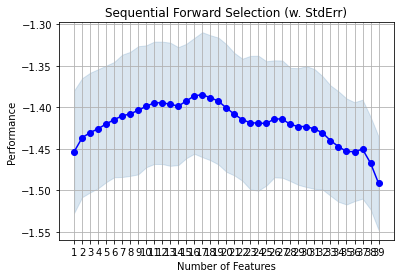

In [70]:
from mlxtend.feature_selection import SequentialFeatureSelector  ## Sequential  Selection
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

sfs = SequentialFeatureSelector(SVR(C=3.0, epsilon=0.2), k_features=39, 
          forward=True, 
          floating=False, 
          scoring='neg_root_mean_squared_error',
          #scoring='neg_mean_squared_error',
          cv=10)
sfs.fit(X_train, y_train)
plt.figsize=(20,15)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

best combination (ACC: -1.385): (7, 9, 11, 12, 13, 20, 21, 23, 24, 25, 26, 28, 30, 31, 34, 36, 37)



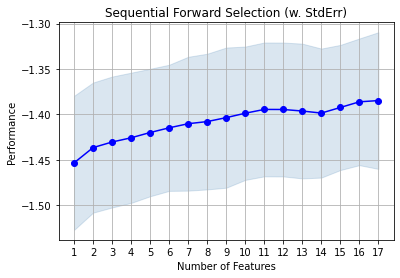

In [72]:
sfs = SequentialFeatureSelector(SVR(C=3.0, epsilon=0.2), k_features=(15, 17),  # range of feature
          forward=True, 
          floating=False, 
          scoring='neg_root_mean_squared_error',
          cv=10)
sfs.fit(X_train, y_train)
print('best combination (ACC: %.3f): %s\n' % (sfs.k_score_, sfs.k_feature_idx_))
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [73]:
sfs.k_feature_names_

('rain',
 'X_3',
 'X_5',
 'X_6',
 'X_7',
 'Y_8',
 'Y_9',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_mar',
 'month_nov',
 'month_oct',
 'day_sat',
 'day_thu',
 'day_tue')

In [74]:
top_attributes = [7, 9, 11, 12, 13, 20, 21, 23, 24, 25, 26, 28, 30, 31, 34, 36, 37]
train_features_six = X_train.iloc[:,top_attributes].copy()
test_features_six = X_test.iloc[:,top_attributes].copy()

train_features_six.head()

,rain,X_3,X_5,X_6,X_7,Y_8,Y_9,month_dec,month_feb,month_jan,month_jul,month_mar,month_nov,month_oct,day_sat,day_thu,day_tue
329,-0.073268,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
61,-0.073268,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
76,-0.073268,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
113,-0.073268,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
192,-0.073268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [75]:
# SVM Regressor

# Training using SVM Regressor
clf_svm.fit(train_features_six, y_train)
# Testing using SVM Regressor
predictions_svm_six = clf_svm.predict(test_features_six)

calculate_errors(predictions_svm_six,"SVM 1 feature")




For SVM 1 feature
RMSE: 67.40908649488266
Absolute error is: 12.996974358050915
RMSE_transformed: 1.494251724883043


## results for top features for SVM are slightly better than then when we use all features, BUT not better then the Mat. Features

In [76]:

## For Hyper parameter selection used Grid Search

def parameter_selection(model,param_grid, X_train, y_train, nfolds=10):
    grid_search = GridSearchCV(model, param_grid, cv=nfolds,verbose =1,n_jobs=4)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    return grid_search

#### Turn the problem into binary classification problem, predict if there is going to be fire or not.
#### if the classifier predicts there is going to be fire then the inference can be done further for burn area, otherwise burn area is predicted is 0.

In [77]:
# add classes
## Creating a categorical output feature
X_train.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,X_2,X_3,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
329,0.282028,-0.133975,0.821382,-0.136477,0.794833,-1.060516,-0.009834,-0.073268,0,0,...,0,0,0,1,0,1,0,0,0,0
61,-0.243833,-0.931043,-1.798600,0.126966,-2.308077,0.902471,1.275141,-0.073268,1,0,...,0,0,0,0,0,0,1,0,0,0
76,-0.733427,-1.526500,-2.037477,-0.817038,-0.549761,-0.079023,-0.512650,-0.073268,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0.209495,-0.505940,0.711628,0.039151,0.001867,-0.569770,-0.736124,-0.073268,0,1,...,0,0,0,1,1,0,0,0,0,0
192,0.753489,-0.040203,0.400119,1.751531,0.984455,-1.367233,0.269509,-0.073268,1,0,...,0,0,0,0,0,0,0,0,1,0


In [78]:
dataset = pd.concat([dataset, labels_original], axis=1, sort=False)
dataset.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,X_2,X_3,...,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,area
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,0,0,...,0,1,0,0,0,0,0,1,0,0.0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,0,0,...,0,1,0,0,1,0,0,0,0,0.0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,0,0,...,0,0,0,0,0,1,0,0,0,0.0


## Creating a categorical output feature

In [79]:
## Creating a categorical output feature
Data = dataset
Data['burned']=1
Data['burned'][Data["area"]==0]=0
Data_with_burned = Data.copy()
Data['burned'].value_counts()

1    270
0    247
Name: burned, dtype: int64

In [80]:
Data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,X_2,X_3,...,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,area,burned
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0,0,...,0,0,0,0,0,0,0,0,0.0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,0,0,...,1,0,0,0,0,0,1,0,0.0,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,0,0,...,1,0,0,1,0,0,0,0,0.0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,0,0,...,0,0,0,0,0,0,0,0,0.0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,0,0,...,0,0,0,0,1,0,0,0,0.0,0


In [81]:
Data.pop('area')
Data_with_burned.pop('area')

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [82]:
labels_classification =  Data.pop('burned')
Data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,X_2,X_3,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,0,0,...,0,0,1,0,0,0,0,0,1,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,0,0,...,0,0,0,0,0,0,1,0,0,0


In [83]:
X_train, X_test, y_train, y_test = train_test_split(Data, labels_classification,  test_size=0.2, random_state=0)

In [84]:
## Applying logistic regression with different parameters
## C - Margin : smaller values specify stronger regularization

LGR_grid_result=parameter_selection(LogisticRegression(),{'penalty':['l1', 'l2'],'C':[0.00001, 0.0001, 0.001,0.01,0.5,1,10,100]}, X_train, y_train,10)
LGR_grid_result.best_estimator_

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  95 tasks      | elapsed:    3.7s


{'C': 1, 'penalty': 'l2'}


[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    4.5s finished


LogisticRegression(C=1)

In [85]:
## Applying SVM with different parameters
from sklearn.svm import SVC
SVC_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,50,100,150], 'gamma' : [0.0001,0.001, 0.01, 0.1, 1,10,100], 'kernel':['poly','rbf']}
SVC_grid_result=parameter_selection(SVC(),SVC_param_grid, X_train, y_train,5)
SVC_grid_result.best_estimator_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    1.7s


{'C': 150, 'gamma': 0.01, 'kernel': 'rbf'}


[Parallel(n_jobs=4)]: Done 560 out of 560 | elapsed:    4.3s finished


SVC(C=150, gamma=0.01)

Logistic Regression
---------------


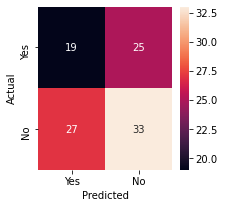

---------------
Means Cross Validation Accuracy Score :0.6775683988409511
Precision : From the Prediction of burned, 74.0% values are predicted correctly
Recall : From overall burned, 70.0% values are predicted correctly
AUC : 65.0%
---------------
Linear SVM
---------------


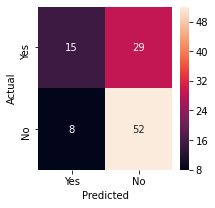

---------------
Means Cross Validation Accuracy Score :0.7233273728582268
Precision : From the Prediction of burned, 89.0% values are predicted correctly
Recall : From overall burned, 73.0% values are predicted correctly
AUC : 69.0%
---------------
gridsearch SVM
---------------


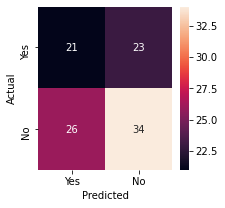

---------------
Means Cross Validation Accuracy Score :0.673086769755537
Precision : From the Prediction of burned, 73.0% values are predicted correctly
Recall : From overall burned, 70.0% values are predicted correctly
AUC : 64.0%
---------------
RBF SVM
---------------


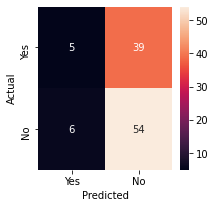

---------------
Means Cross Validation Accuracy Score :0.7262377956616664
Precision : From the Prediction of burned, 98.0% values are predicted correctly
Recall : From overall burned, 73.0% values are predicted correctly
AUC : 70.0%
---------------
Decision Tree
---------------


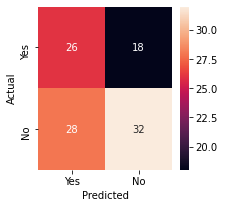

---------------
Means Cross Validation Accuracy Score :0.7038440305819141
Precision : From the Prediction of burned, 75.0% values are predicted correctly
Recall : From overall burned, 71.0% values are predicted correctly
AUC : 71.0%
---------------
Random Forest
---------------


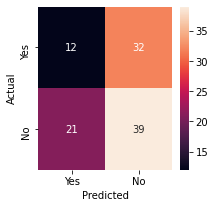

---------------
Means Cross Validation Accuracy Score :0.6935429530078862
Precision : From the Prediction of burned, 78.0% values are predicted correctly
Recall : From overall burned, 70.0% values are predicted correctly
AUC : 70.0%
---------------


In [86]:


names = ["Logistic Regression","Linear SVM", "gridsearch SVM" ,"RBF SVM",
         "Decision Tree", "Random Forest"]

classifiers = [
   LGR_grid_result.best_estimator_,
    SVC(kernel="linear", C=0.025),
    SVC_grid_result.best_estimator_,
    SVC(gamma=2, C=1),
  
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

    ]

# iterate over classifiers
for name, clf in zip(names, classifiers):
       
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    ## Validation
    y_pred = clf.predict(X_test)
    y_train_pred=clf.predict(X_train)

    
    ## Confusion Matrix 
    print(name)
    print('---------------')
    
    fig, ax = plt.subplots(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',xticklabels=['Yes','No'], yticklabels=['Yes','No'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    ## K Fold Validation with 10 Folds
    scores = cross_val_score(clf, Data,labels_classification, cv=10, scoring="accuracy")
    scores=np.sqrt(scores)

    print('---------------')
    print("Means Cross Validation Accuracy Score :"+str(np.mean(scores)))
    print('Precision : From the Prediction of burned, '+str(round(np.mean(np.sqrt(cross_val_score(clf, Data, labels_classification, cv=10, scoring="recall"))),2)*100)+'% values are predicted correctly')
    print('Recall : From overall burned, '+str(round(np.mean(np.sqrt(cross_val_score(clf, Data, labels_classification, cv=10, scoring="precision"))),2)*100)+'% values are predicted correctly')
    print('AUC : '+str(round(np.mean(np.sqrt(cross_val_score(clf, Data, labels_classification, cv=10, scoring="roc_auc"))),2)*100)+'%')
    print('---------------')


#### Decision Tree has the best AUC (71%) from all above classifiers, But it does not have better precision and recall score when compared to RBF SVM.
#### Precision(98%) and  Recall(73%) wise RBF SVM is doing well compared to all other classifiers.
#### RBF SVM also has AUC of 70% which is second best. 

In [87]:
def K_fold_measures(model,Data,labels):
    ## K Fold Validation
    scores = cross_val_score(model, Data, labels, cv=10, scoring="neg_mean_squared_error")
    scores=np.sqrt(abs(scores))
    
      
    print(" ")
    #print("Cross Validation RMSE Scores "+str(scores))
    print("Cross Validation RMSE Mean Score "+str(np.mean(scores, dtype=np.float64)))
    
    ## RMSE of Orginal Area
    #print("Cross Validation RMSE Mean Score Orginial Burned Area Value "+str(np.exp(np.mean(scores, dtype=np.float64))-1))
    
    O_Data_pred=model.predict(Data)
    print("R2 Score "+str(r2_score(labels,O_Data_pred)))
    
    area_original_normalized = np.exp(labels)-1
    area_predicted_normalized =np.exp( O_Data_pred)-1
    
    
    # RootMeanSquared Error Calculation 
   # print("\n\nFor "+model.str())
    meanSquaredError_nb_one = mean_squared_error(area_original_normalized, area_predicted_normalized)
    #print("MSE:", meanSquaredError_nb_one)
    rootMeanSquaredError_nb_one = sqrt(meanSquaredError_nb_one)
    print("RMSE:", rootMeanSquaredError_nb_one)

    # MeanAbsolute Error Calculation 
    absolute_error_nb_one = mean_absolute_error(area_original_normalized, area_predicted_normalized)
    print("Absolute error is:", absolute_error_nb_one)
    
    
    #print("R2 error is(true Area values):",r2_score(area_original_normalized, area_predicted_normalized))

In [88]:
Data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,X_2,X_3,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,0,0,...,0,0,1,0,0,0,0,0,1,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,0,0,...,0,0,0,0,0,0,1,0,0,0


In [89]:
# Partitioning the dataset into test and train (test = (25% of total data) and train = (75% of total data) )
X_train, X_test, y_train, y_test = train_test_split(Data, labels_transformed, test_size=0.25, random_state = 4)

# for M (using only four weather conditions)
train_features_four = X_train[[ 'temp', 'RH', 'wind', 'rain']].copy()
test_features_four = X_test[['temp', 'RH', 'wind', 'rain']].copy()

train_features_four.head()

,temp,RH,wind,rain
329,0.794833,-1.060516,-0.009834,-0.073268
61,-2.308077,0.902471,1.275141,-0.073268
76,-0.549761,-0.079023,-0.512650,-0.073268
113,0.001867,-0.569770,-0.736124,-0.073268
192,0.984455,-1.367233,0.269509,-0.073268


In [90]:
##gamma parameter defines how far the influence of a single training example reaches, 
#with low values meaning ‘far’ and high values meaning ‘close’
#large C - avoid missclassification, small margin, converse

SVR_param_grid = {'C': [0.001,  0.1, 1,3, 10,100], 'gamma' : [0.0001,0.001, 0.01, 0.1, 1,10], 
                  'kernel':['rbf','poly','linear'],'epsilon': [ 0.001, 0.01, 0.1,1, 10]}
#SVR_grid_result=param_selection(SVR(),SVR_param_grid,Data[[ 'temp', 'RH', 'wind', 'rain']], labels_transformed,10)
#SVR_grid_result.best_estimator_

In [91]:
# All model comparision 

models = [
    LinearRegression(fit_intercept=True, n_jobs=None,normalize=False),
    linear_model.Lasso(alpha=.01,   normalize=False),
    linear_model.Ridge(alpha=1e-05, normalize=False),
    SVR(C=3, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=2,  kernel='rbf', tol=0.001)
         
]



for model in models:
    model_name = model.__class__.__name__
    model.fit(train_features_four,y_train)
    
   
    print(model_name)
    print("------------")
    K_fold_measures(model,Data[[ 'temp', 'RH', 'wind', 'rain']],labels_transformed) 
    print("------------")
    

LinearRegression
------------
 
Cross Validation RMSE Mean Score 1.4618932364863693
R2 Score 0.009249061084740329
RMSE: 64.45331689461199
Absolute error is: 12.981409624272152
------------
Lasso
------------
 
Cross Validation RMSE Mean Score 1.4048544037437203
R2 Score 0.009019618025797316
RMSE: 64.45894912156558
Absolute error is: 12.980707755641237
------------
Ridge
------------
 
Cross Validation RMSE Mean Score 1.4618931610579644
R2 Score 0.009249061106068712
RMSE: 64.4533168959954
Absolute error is: 12.981409623755866
------------
SVR
------------
 
Cross Validation RMSE Mean Score 1.5188610381865997
R2 Score 0.21465573293160112
RMSE: 62.88571683107614
Absolute error is: 11.786898493415132
------------


### with newly calculated 'Burned' Feature

In [92]:
Data_with_burned.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'X_2', 'X_3',
       'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_3', 'Y_4', 'Y_5', 'Y_6',
       'Y_8', 'Y_9', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_mon', 'day_sat', 'day_sun', 'day_thu',
       'day_tue', 'day_wed', 'burned'],
      dtype='object')

In [93]:

X_train, X_test, y_train, y_test = train_test_split(Data_with_burned, labels_transformed, test_size=0.25, random_state = 4)

# for M (using only four weather conditions)
train_features_four = X_train[[ 'temp', 'RH', 'wind', 'rain','burned']].copy()
test_features_four = X_test[['temp', 'RH', 'wind', 'rain','burned']].copy()

train_features_four.head()

,temp,RH,wind,rain,burned
329,0.794833,-1.060516,-0.009834,-0.073268,1
61,-2.308077,0.902471,1.275141,-0.073268,0
76,-0.549761,-0.079023,-0.512650,-0.073268,0
113,0.001867,-0.569770,-0.736124,-0.073268,0
192,0.984455,-1.367233,0.269509,-0.073268,1


In [94]:
# All model comparision  
#R-squared is the fraction by which the variance of the errors is less than the variance of the dependent variable

models = [
    LinearRegression(fit_intercept=True, n_jobs=None,normalize=False),
    linear_model.Lasso(alpha=.01,   normalize=False),
    linear_model.Ridge(alpha=1e-05, normalize=False),
    SVR(C=3, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=2,  kernel='rbf', tol=0.001)
         
]

for model in models:
    model_name = model.__class__.__name__
    model.fit(train_features_four,y_train)
    
   
    print(model_name)
    print("------------")
    K_fold_measures(model,Data_with_burned[[ 'temp', 'RH', 'wind', 'rain','burned']],labels_transformed) 
    print("------------")

LinearRegression
------------
 
Cross Validation RMSE Mean Score 0.8129440353880539
R2 Score 0.5798291311064595
RMSE: 63.61345983040902
Absolute error is: 11.554764291195582
------------
Lasso
------------
 
Cross Validation RMSE Mean Score 0.8086321962332323
R2 Score 0.578941766616914
RMSE: 63.637648965077766
Absolute error is: 11.557029865558022
------------
Ridge
------------
 
Cross Validation RMSE Mean Score 0.81294402977069
R2 Score 0.5798291309289925
RMSE: 63.61345994614497
Absolute error is: 11.554764251878618
------------
SVR
------------
 
Cross Validation RMSE Mean Score 1.015888907568905
R2 Score 0.6470895423519027
RMSE: 61.39442317111525
Absolute error is: 10.276474439920184
------------


### Summary & Conclusion
#### * SVM produced better model Error Mesurement wise for classification & regression both.
#### * Automated feature combination selection.
#### * Classifier inference can be used as a feature for regression. Also, The problem can also be turned into Multiclass classifier problem as area lies between some specific ranges. 
#### * Outlier Detection for meteorological data suggested in original paper could also be tried.
